In [37]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

# Load in Images

The data directories are comprised of the file path strings, one for each train, test, and split. Within the file paths are two folders. One folder has normal chest xray photos (no pneumonia) and another folder has chest xrays of people with pneumonia.

In [38]:
datadir_train = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
datadir_test = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/test'
datadir_validate = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/val'
categories = ['NORMAL', 'PNEUMONIA']

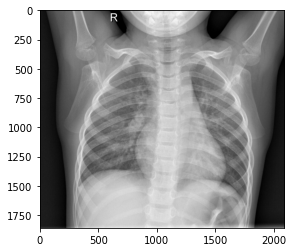

In [39]:
#within the train dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_train, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

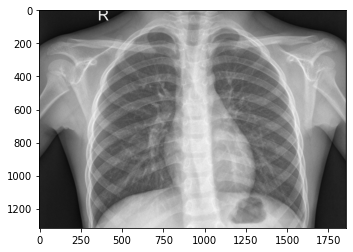

In [40]:
#within the test dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_test, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

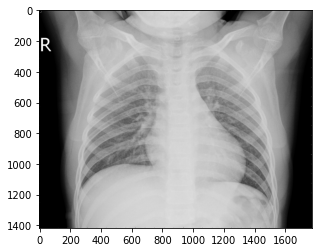

In [41]:
#within the validate dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_validate, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

In [73]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_train, 
        target_size=(256, 256), 
        batch_size = 5216, 
        seed = 123,
        class_mode="binary")
#         color_mode ='grayscale') 

Found 5216 images belonging to 2 classes.


In [74]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_test, 
        target_size=(256, 256), 
        batch_size = 624, 
        seed = 123,
        class_mode="binary") 

Found 624 images belonging to 2 classes.


In [75]:
data_val = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_validate, 
        target_size=(256, 256), 
        batch_size = 16, 
        seed = 12,
        class_mode="binary") 

Found 16 images belonging to 2 classes.


In [48]:
#split images and labels
# images, labels = next(data_train)

In [49]:
# labels

In [50]:
# images[0][0][0]

In [76]:
train_images, train_labels = next(data_train)
# test_images, test_labels = next(data_test)

In [77]:
test_images, test_labels = next(data_test)

In [78]:
val_images, val_labels = next(data_val)

In [79]:
train_images[:1]

array([[[[0.2392157 , 0.2392157 , 0.2392157 ],
         [0.3019608 , 0.3019608 , 0.3019608 ],
         [0.34901962, 0.34901962, 0.34901962],
         ...,
         [0.31764707, 0.31764707, 0.31764707],
         [0.3019608 , 0.3019608 , 0.3019608 ],
         [0.32156864, 0.32156864, 0.32156864]],

        [[0.24705884, 0.24705884, 0.24705884],
         [0.28627452, 0.28627452, 0.28627452],
         [0.3529412 , 0.3529412 , 0.3529412 ],
         ...,
         [0.3254902 , 0.3254902 , 0.3254902 ],
         [0.2901961 , 0.2901961 , 0.2901961 ],
         [0.29411766, 0.29411766, 0.29411766]],

        [[0.28235295, 0.28235295, 0.28235295],
         [0.30588236, 0.30588236, 0.30588236],
         [0.3254902 , 0.3254902 , 0.3254902 ],
         ...,
         [0.31764707, 0.31764707, 0.31764707],
         [0.28627452, 0.28627452, 0.28627452],
         [0.2784314 , 0.2784314 , 0.2784314 ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [80]:
train_labels[:4]

array([0., 1., 1., 1.], dtype=float32)

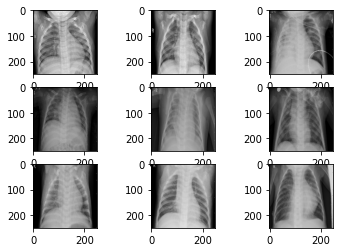

In [56]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[i])
plt.show()

# Modeling

In [81]:
X_train = np.array(train_images)
y_train = np.array(train_labels)

X_test = np.array(test_images)
y_test = np.array(test_labels)

X_val = np.array(val_images)
y_val = np.array(val_labels)

In [82]:
X_train.shape

(5216, 256, 256, 3)

In [83]:
y_train

array([0., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [60]:
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [61]:
# num_classes = 1
# batch_size = 1
# epochs = 5

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

# # specifying the model structure
# model = Sequential()

# # specify the first hidden layer
# model.add(Dense(64, (3, 3), activation='relu', input_shape = X.shape[1:]))

# # specify the second layer
# model.add(Dense(64, (3, 3), activation='relu'))

# # specify the output layer
# model.add(Dense(num_classes, activation='sigmoid'))

# model.summary()

# model.compile(loss='categorical_crossentropy',
#               optimizer=SGD(),
#               metrics=['accuracy'])

# history = model.fit(X_train, y_train,
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=(X_test, y_test))
# score = model.evaluate(X_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

# Model Two

In [64]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(250, 250,  3))) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [65]:
cnn1 = cnn.fit(X_train,
                y_train,
                epochs=5,
                batch_size=50,
                validation_data=(X_val, y_val))

Epoch 1/5
105/105 [==============================] - 614s 6s/step - loss: 0.5546 - acc: 0.7345 - val_loss: 0.8177 - val_acc: 0.5625
Epoch 2/5
105/105 [==============================] - 681s 6s/step - loss: 0.3772 - acc: 0.8410 - val_loss: 1.2711 - val_acc: 0.6250
Epoch 3/5
105/105 [==============================] - 440s 4s/step - loss: 0.2516 - acc: 0.9042 - val_loss: 0.7718 - val_acc: 0.6250
Epoch 4/5
105/105 [==============================] - 414s 4s/step - loss: 0.2152 - acc: 0.9147 - val_loss: 0.5682 - val_acc: 0.7500
Epoch 5/5
105/105 [==============================] - 425s 4s/step - loss: 0.1755 - acc: 0.9327 - val_loss: 0.3717 - val_acc: 0.8750


In [66]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 248, 248, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 122, 122, 32)      18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 119072)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                3810336   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [67]:
results_train = cnn.evaluate(X_train, y_train)
results_test = cnn.evaluate(X_test, y_test)
print(results_train, results_test)

20/20 [==============================] - 13s 662ms/step - loss: 0.4999 - acc: 0.7901
[0.1391398012638092, 0.9484279155731201] [0.499891072511673, 0.7900640964508057]


In [72]:
cnn.save('CNN.h5')

In [ ]:
#make predictions using your model 
#my_prediction = my_model.predict(x_test)

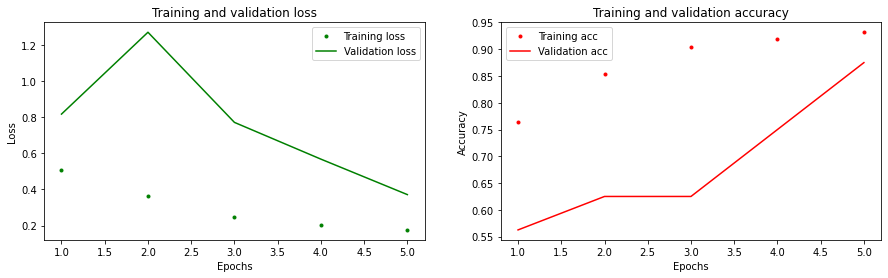

In [69]:
hist_cnn = cnn1.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Another model

In [53]:
# model = keras.models.Sequential([
#     keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
#     keras.layers.Dense(1)
# ])
# model.compile(loss="mean_squared_error", optimizer="sgd")
# history = model.fit(X_train, y_train, epochs=20,
#                     validation_data=(X_val, y_val))
# mse_test = model.evaluate(X_test, y_test)
# X_new = X_test[:3] # pretend these are new instances
# y_pred = model.predict(X_new)

Epoch 1/20
163/163 [==============================] - ETA: 0s - loss: 0.2175

InvalidArgumentError:  Incompatible shapes: [16,2] vs. [16,224,224,1]
	 [[node mean_squared_error/SquaredDifference (defined at <ipython-input-53-6c63a42a3fde>:6) ]] [Op:__inference_test_function_2222]

Function call stack:
test_function


In [87]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.MaxPooling2D((2, 2),padding='same'))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.MaxPooling2D((2, 2),padding='same'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.007),
              metrics=['acc'])

In [88]:
cnn1 = cnn.fit(X_train,
                y_train,
                epochs=5,
                batch_size=50,
                validation_data=(X_val, y_val))

Epoch 1/5
105/105 [==============================] - 421s 4s/step - loss: 2.8946 - acc: 0.7367 - val_loss: 1.3442 - val_acc: 0.8125
Epoch 2/5
105/105 [==============================] - 508s 5s/step - loss: 0.3065 - acc: 0.8551 - val_loss: 1.3487 - val_acc: 0.6875
Epoch 3/5
105/105 [==============================] - 468s 4s/step - loss: 0.2352 - acc: 0.8935 - val_loss: 1.4990 - val_acc: 0.5625
Epoch 4/5
105/105 [==============================] - 437s 4s/step - loss: 0.2731 - acc: 0.8641 - val_loss: 0.7522 - val_acc: 0.8750
Epoch 5/5
105/105 [==============================] - 425s 4s/step - loss: 0.1959 - acc: 0.9191 - val_loss: 1.6547 - val_acc: 0.8125


In [89]:
cnn.save('CNN2.h5')

In [90]:
# tic = time.time()
# toc = time.time()
# print('run time:', toc-tic)

In [93]:
tic = time.time()
cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256,  3), padding = 'same')) #3 x 3 shape of filter, 64 convolutions
cnn.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2),padding='same'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(1, activation='sigmoid')) #sigmoid bc classification problem

cnn.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.002),
              metrics=['acc'])

In [ ]:
cnn1 = cnn.fit(X_train,
                y_train,
                epochs=9,
                batch_size=25,
                validation_data=(X_val, y_val))
toc = time.time()
print('run time:', toc-tic)

Epoch 1/9
  9/209 [>.............................] - ETA: 4:28 - loss: 1.5097 - acc: 0.5061

In [ ]:
cnn.save('CNN3.h5')